<a href="https://colab.research.google.com/github/joykiriba/DS-CORE-WEEK4-IP/blob/main/Final_%22Moringa_Data_Science_Core_W4_Independent_Project_2021_05_Joy_Kiriba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis testing

The electric car sharing service is a viable alternative to the use of individuals using their own cars. It saves on fuel, mileage and harmful emissions. They are especially of great advantage to use in the urban areas where traffic is a major problem to the residents. Another perk of using these services is that you are able to return the car to another station within the service area making it very convenient to the users. The dataset contains the usage of the blue cars, utilib and utilib 14. In this particular study we’ll be investigating the number of blue cars taken from stations within two separate postal codes, our focus being on the weekdays. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

Our two hypothesis are:

Null Hypothesis, $H_{0}$: There is no difference in the average number of blue cars taken from stations with postal code 92500 and those taken from stations with postal code 92600.

Alternative Hypothesis, $H_{1}$: There is a difference in the average number of blue cars taken from stations with postal code 92500 and those taken from stations with postal code 92600.



##**1**. Reading the Data

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [75]:
# Loading the Data from the source- column Definitions
# ---
# Dataset url = http://bit.ly/VariableDefinitions 
# ---
#
autolib_definitions = pd.read_excel('columns_explanation.xlsx')


In [76]:
# Loading the Data from the source- main dataset
# ---
#
autolib = pd.read_csv('autolib.csv')

##**2**. Checking the Data

In [77]:
# Determining the no. of records in our dataset
#
autolib.shape

(16085, 13)

In [78]:
# Previewing the variable definitions dataset
#
autolib_definitions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [79]:
# Previewing the top of our dataset
#
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [80]:
# Previewing the bottom of our dataset
# 
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [81]:
# Checking whether each column has an appropriate datatype
#
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [82]:
# to get general information on the dataframe

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [83]:
# to get a statistical summary of the dataframe(continuous variables)

autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


##**3**. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

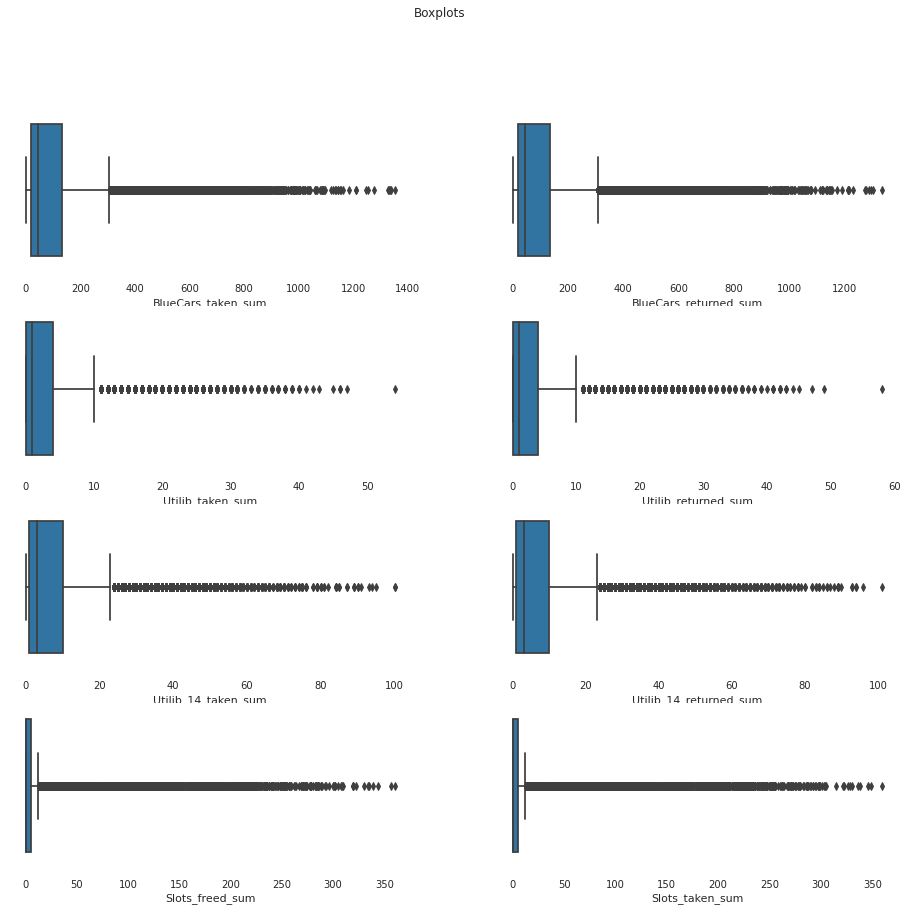

In [84]:
# Checking for Outliers
	

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(16, 14))
fig.suptitle('Boxplots')
sns.boxplot(autolib['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(autolib['BlueCars_returned_sum'], ax=ax2)
sns.boxplot(autolib['Utilib_taken_sum'], ax=ax3)
sns.boxplot(autolib['Utilib_returned_sum'], ax=ax4)
sns.boxplot(autolib['Utilib_14_taken_sum'], ax=ax5)
sns.boxplot(autolib['Utilib_14_returned_sum'], ax=ax6)
sns.boxplot(autolib['Slots_freed_sum'], ax=ax7)
sns.boxplot(autolib['Slots_taken_sum'], ax=ax8)



In [85]:
# getting rid of the outliers

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
autolib = autolib[~((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
print(autolib.shape)

Postal code               91330.0
n_daily_data_points        1439.0
dayOfWeek                     1.0
BlueCars_taken_sum           20.0
BlueCars_returned_sum        20.0
Utilib_taken_sum              0.0
Utilib_returned_sum           0.0
Utilib_14_taken_sum           1.0
Utilib_14_returned_sum        1.0
Slots_freed_sum               0.0
Slots_taken_sum               0.0
Name: 0.25, dtype: float64
Postal code               93400.0
n_daily_data_points        1440.0
dayOfWeek                     5.0
BlueCars_taken_sum          135.0
BlueCars_returned_sum       135.0
Utilib_taken_sum              4.0
Utilib_returned_sum           4.0
Utilib_14_taken_sum          10.0
Utilib_14_returned_sum       10.0
Slots_freed_sum               5.0
Slots_taken_sum               5.0
Name: 0.75, dtype: float64
Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0


In [ ]:
# converting postal code to a string
# converting date to datetime

autolib['Postal code'] = autolib['Postal code'].astype(str)
autolib['date'] = pd.to_datetime(autolib['date'])
autolib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             9783 non-null   object        
 1   date                    9783 non-null   datetime64[ns]
 2   n_daily_data_points     9783 non-null   int64         
 3   dayOfWeek               9783 non-null   int64         
 4   day_type                9783 non-null   object        
 5   BlueCars_taken_sum      9783 non-null   int64         
 6   BlueCars_returned_sum   9783 non-null   int64         
 7   Utilib_taken_sum        9783 non-null   int64         
 8   Utilib_returned_sum     9783 non-null   int64         
 9   Utilib_14_taken_sum     9783 non-null   int64         
 10  Utilib_14_returned_sum  9783 non-null   int64         
 11  Slots_freed_sum         9783 non-null   int64         
 12  Slots_taken_sum         9783 non-null   int6

In [ ]:
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,2018-01-01,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,2018-01-02,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,2018-01-03,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,2018-01-05,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,2018-01-07,1440,6,weekend,28,17,0,0,1,1,4,2


In [ ]:
# Checking for Anomalies
# to remove white spaces, replace spaces in the column names with an underscore and lower the case of column names

autolib.columns = autolib.columns.str.strip().str.replace(' ', '_').str.lower()
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# check for duplicates

autolib.duplicated().sum()

# there are no duplicates 


0

In [ ]:
# Identifying the Missing Data
#
# print(finance.isnull().any())

autolib.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#
autolib_new = autolib.dropna()
autolib_new.shape

(9783, 13)

In [ ]:
# dropping unnecessary columns 


autolib_new.drop(['bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
                            'utilib_14_taken_sum', 'utilib_14_returned_sum','slots_freed_sum',
                            'slots_taken_sum','n_daily_data_points', 'dayofweek'], axis=1, inplace=True)

In [ ]:
# exporting cleaned data

autolib_new.to_csv('autolib_clean.csv')

In [ ]:
autolib_new.columns

Index(['postal_code', 'date', 'day_type', 'bluecars_taken_sum'], dtype='object')

##**4**. Exploratory Analysis

In [ ]:
!pip install pandas-profiling==2.7.1

import pandas_profiling
from pandas_profiling import ProfileReport

     |████████████████████████████████| 256kB 7.7MB/s 
     |████████████████████████████████| 3.2MB 8.6MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 1.1MB 42.0MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 296kB 47.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=9925286bfabca7f25e77702c35e72a1b798ab75c5ca1a3b5590598d7312d355c
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=f51e340d09529c4e4ca8ae17588a9b0b8f4eb338c1b9ed464a874813d7cf2bf0
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing ins

In [ ]:
#creating report
prof = ProfileReport(autolib_new)
prof

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.1 Univariate Analysis


#### Categorical variables. 
#### Among the 4 columns in the dataset we have 2 categorical columns, daytype and postal code

In [ ]:
autolib_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   postal_code         9783 non-null   object        
 1   date                9783 non-null   datetime64[ns]
 2   day_type            9783 non-null   object        
 3   bluecars_taken_sum  9783 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 382.1+ KB


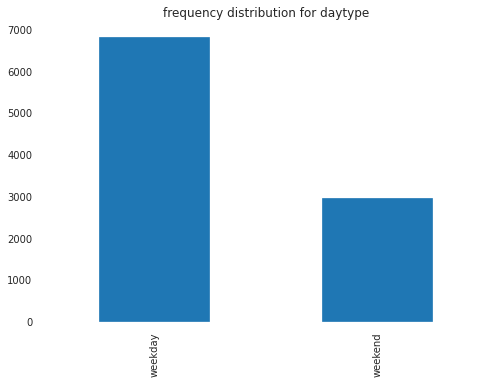

In [ ]:
# Ploting the univariate summaries and recording our observations
# daytype
# bar chart for daytype

autolib_new['day_type'].value_counts().plot.bar(title='frequency distribution for daytype')


Bluecars are used more during the weekdays.

In [ ]:
# frequency table for postal code

autolib_new['postal_code'].value_counts()

92380    130
92350    130
94220    130
92120    130
93360    130
        ... 
93260    101
92800     82
93390     72
92130     65
92100      4
Name: postal_code, Length: 79, dtype: int64

#### Continuous Variables
#### Among the 4 columns we have 1 continuous variables: 'bluecars_taken_sum'



In [ ]:
autolib_new.columns

Index(['postal_code', 'date', 'day_type', 'bluecars_taken_sum'], dtype='object')

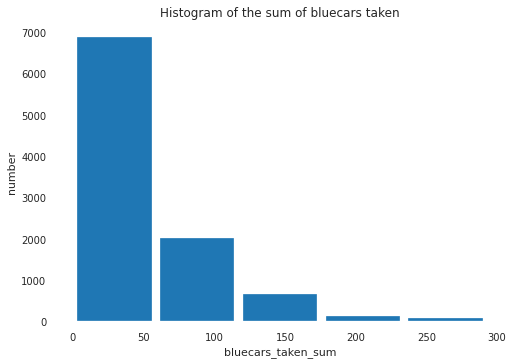

In [ ]:
# Plotting a histogram to show distribution of the bluecars taken

data = autolib_new['bluecars_taken_sum']

plt.hist(data, bins=5, histtype='bar', rwidth=0.9)

plt.xlabel('bluecars_taken_sum')
plt.ylabel('number')
plt.title('Histogram of the sum of bluecars taken') 
plt.show()

##### a.) Measures of central tendency


In [ ]:
# finding the mean of the bluecars taken

autolib_new['bluecars_taken_sum'].mean()

49.242870285188594

In [ ]:
# finding the median of the bluecars taken

autolib_new['bluecars_taken_sum'].median()

34.0

In [ ]:
# finding the mode of the bluecars taken

autolib_new['bluecars_taken_sum'].mode()

0    12
dtype: int64

##### b.) Measures of dispersion

In [ ]:
# finding the standard deviation of bluecars taken

autolib_new['bluecars_taken_sum'].std()

46.303794622721085

In [ ]:
# finding the variance

autolib_new['bluecars_taken_sum'].var()

2144.041396463134

In [ ]:
# finding the range

maximum = autolib_new['bluecars_taken_sum'].max()
minimum = autolib_new['bluecars_taken_sum'].min()
range = maximum - minimum
range

293

In [ ]:
# finding the quantiles

autolib_new['bluecars_taken_sum'].quantile([0.25,0.5,0.75])

0.25    17.0
0.50    34.0
0.75    67.0
Name: bluecars_taken_sum, dtype: float64

In [ ]:
# computing skewness

autolib_new['bluecars_taken_sum'].skew()


1.7911948887384719

In [ ]:
# computing kurtosis

autolib_new['bluecars_taken_sum'].kurt()


3.9107948136076676

### 4.2 Bivariate Analysis

#### Numerical and Categorical

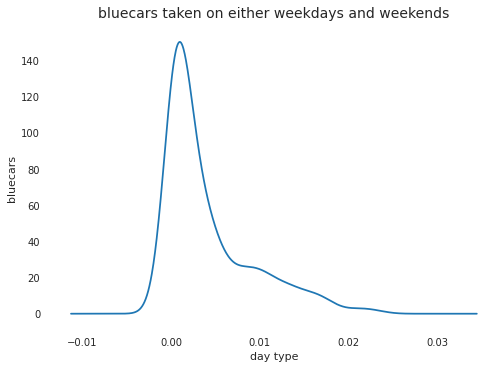

In [86]:
# Plotting our line graph of day type and number of blue cars taken

autolib_new.groupby('day_type')['bluecars_taken_sum'].value_counts(normalize=True).plot(kind='kde')

# Giving a title to our line graph
plt.title('bluecars taken on either weekdays and weekends', fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('bluecars')

# Labelling the x-axis
plt.xlabel('day type')
 
# Displaying our graph
plt.show()

##**5.** Sampling

We'll be using stratified random sampling to get the sample for our hypotesis testing.



In [87]:
# picking the postal codes to use.
# we'll choose two postal codes that are not so different from each other in terms of the bluecars taken

autolib_new.groupby('postal_code')[['bluecars_taken_sum']].sum().sort_values(by ='bluecars_taken_sum', ascending= False)


,bluecars_taken_sum
postal_code,
92150,19784
92000,18518
92600,17698
92500,17087
92130,16823
...,...
94100,658
93150,654
93370,481


In [88]:
# the two postal codes to be used are 92600 and 92500


postal2 = autolib_new[((autolib_new['postal_code'] == '92600') | (autolib_new['postal_code'] == '92500')) & (autolib['day_type'] == 'weekday')]
postal2.head()


,postal_code,date,day_type,bluecars_taken_sum
9343,92500,2018-01-01,weekday,148
9344,92500,2018-01-02,weekday,102
9345,92500,2018-01-03,weekday,131
9347,92500,2018-01-05,weekday,142
9350,92500,2018-01-08,weekday,94


In [89]:
postal2.tail()

,postal_code,date,day_type,bluecars_taken_sum
9647,92600,2018-06-12,weekday,187
9648,92600,2018-06-13,weekday,162
9649,92600,2018-06-14,weekday,144
9650,92600,2018-06-15,weekday,192
9653,92600,2018-06-18,weekday,109


In [90]:
postal2.shape

(171, 4)

In [91]:
postal2['postal_code'].value_counts()

92500    86
92600    85
Name: postal_code, dtype: int64

In [92]:
# stratified sample

strat_output = postal2.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.3))

# proportion of the non_stratified sample

print(strat_output['postal_code'].value_counts())

# Check the stratified output

print(strat_output)

92500    26
92600    26
Name: postal_code, dtype: int64
     postal_code       date day_type  bluecars_taken_sum
9405       92500 2018-03-07  weekday                 148
9445       92500 2018-04-16  weekday                 102
9385       92500 2018-02-12  weekday                 119
9455       92500 2018-04-26  weekday                 118
9373       92500 2018-01-31  weekday                 141
9432       92500 2018-04-03  weekday                 129
9493       92500 2018-06-14  weekday                 131
9417       92500 2018-03-19  weekday                 124
9371       92500 2018-01-29  weekday                  98
9421       92500 2018-03-23  weekday                 135
9410       92500 2018-03-12  weekday                 110
9413       92500 2018-03-15  weekday                 138
9438       92500 2018-04-09  weekday                 114
9396       92500 2018-02-23  weekday                 124
9359       92500 2018-01-17  weekday                 143
9414       92500 2018-03-16  wee

##**6.** Hypothesis Testing

In [93]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, t, norm
import statsmodels.stats.api as sms

In [94]:
# finding the sample mean

sample_mean = strat_output['bluecars_taken_sum'].mean()
sample_mean

135.46153846153845

In [95]:
# finding the population mean

pop_mean = postal2['bluecars_taken_sum'].mean()
pop_mean

134.91228070175438

In [ ]:
# finding the population standard deviatian

pop_std = postal2['bluecars_taken_sum'].std()
pop_std

21.7458155826825

In [96]:
# conducting a z test

strat_output.mean()

zscore = (sample_mean - pop_mean)/ pop_std
print("Z score: ", zscore)
prob = norm.cdf(zscore)
print("pvalue: ", prob)
print("_" * 50)
print("With a significance of 5%, we fail to reject the null hypothesis")


Z score:  0.025258089663074135
pvalue:  0.5100754485698914
__________________________________________________
With a significance of 5%, we fail to reject the null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


After conducting our z-test, we've found the Z score to be -0.13127069818137072 and the p value to be 0.4477805853217691. The p value of 0.4478 is greater than our alpha of 0.05 meaning there is no statistical significance for us to reject our null hypothesis.we will therefore fail to reject the null hypothesis of there is no difference in the average number of blue cars taken from stations with postal code 92500 and those taken from stations with postal code 92600 on weekdays. There’s a 44.77% that there is a difference in the average number of blue cars taken from stations with postal code 92500 and those taken from stations with postal code 92600 on weekdays.